<img src="https://github.com/Rubyw123/TMDB-Revenue-Prediction/blob/master/tmdb.png?raw=1" align="center">

<h2 align="center">TMDB MOVIE DATA ANALYSIS AND PREDICITNG THE MODEL</h2>

- Introduction
- Data Set
- Projejct Objective
- Project Motivation
- Software Needed
- Loading the Data and Importing Libraries
- Gathering Data
- Exploratory Data Analysis
- Featured Engineering
- Conclusion


## <font color='brown'>Introduction</font>

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

From business point of view, one of the main interests of the film studios and its related stakeholders is a prediction of revenue that a new movie can generate based on a few given input attributes before its released date.

## <font color='brown'>Data Set</font>

This dataset taken from Kaggle,  are provided with 3000 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. [Source](https://www.kaggle.com/zero92/tmdb-prediction/data) file name train.csv

## <font color='brown'>Project Objective</font>

The primary goal is to build a machine-learning model to predict the revenue of a new movie given such features as budget, release dates, genres. The modeling performance is evaluating based on the Rsquare.

The secondary goal is to practice skills data wrangling, data visualization, Random forest, Linear Regression,LGB boost, GB regressor

## <font color='brown'>Project Methodlogy</font>

This project has 4 high-level steps:

* Step 1: Data acquisition which we have extracted for TMDB data set.

* Step 2: data exploratory analysis and features engineering explore and visualize the data to have an overview with-in and between the variables, what’s insights gained and what’s new features added in. 
* Step 3: modeling experiments design and conduct a set of experiments to evaluate performance and select machine learning method, compare and select features selection approach.

* Step 4: final evaluate the model on the validation set using R Square.

## <font color='brown'>Software Needed</font>

Software: Python and Jupyter Notebook

The following packages (libraries) need to be installed:

1. pandas
2. NumPy
3. scikit Learn
4. wordcount
5. eli5 (not installed)
6. TFID
7. LGB boost
8. GB regressor


In [18]:
!python -m pip install eli5
!python -m pip install matplotlib
!python -m pip install seaborn
!python -m pip install wordcloud
!python -m pip install nltk 
!python -m pip install plotly
!python -m pip install xgboost
!python -m pip install lightgbm

                                              0.0/70.9 MB ? eta -:--:--
                                              0.1/70.9 MB 1.7 MB/s eta 0:00:43
                                              0.1/70.9 MB 2.4 MB/s eta 0:00:30
                                              0.1/70.9 MB 2.4 MB/s eta 0:00:30
                                              0.2/70.9 MB 1.9 MB/s eta 0:00:38
                                              0.6/70.9 MB 3.7 MB/s eta 0:00:20
                                              1.1/70.9 MB 5.6 MB/s eta 0:00:13
                                              1.6/70.9 MB 6.9 MB/s eta 0:00:11
     -                                        2.2/70.9 MB 8.9 MB/s eta 0:00:08
     -                                        2.3/70.9 MB 7.3 MB/s eta 0:00:10
     -                                        2.7/70.9 MB 7.9 MB/s eta 0:00:09
     -                                        3.3/70.9 MB 8.8 MB/s eta 0:00:08
     -                                        3.5/70.9 MB 8

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## <font color='brown'>Loading the Data and Importing Libraries</font>

In [19]:
import numpy as np
import pandas as pd
import sklearn
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection # for splitting into train and test
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import eli5
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
print('Libraries imported..')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hongj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Libraries imported..


## <font color='brown'>**Gathering Data**</font>

In [ ]:
#loading the data set
df = pd.read_csv("movies_metadata.csv")
#displaying top 5 data set
df.head()

<ipython-input-4-a6c06b9b7034>:2: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
#printing out column
#for col in df.columns:
    #print(col)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# get number of rows and columns
df.shape

(45466, 24)

In [ ]:
# budget to float (set NaN if error)
df['budget'] = pd.to_numeric(df['budget'],errors = 'coerce')

In [ ]:
# set popularity to float
df['popularity'] = pd.to_numeric(df['popularity'],errors = 'coerce')

In [ ]:
#finding null value
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       3
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   6
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
#Let's find duplicate data set
df.duplicated().sum()

17

In [ ]:
df.isna().sum().sum()

105566

In [ ]:
#df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [ ]:
 # statistical description, only for numeric values
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642
popularity,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965
revenue,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022
runtime,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539
vote_average,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607
vote_count,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000


In [ ]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 36573
Rows With Zero Values In The Revenue Column: 38052


In [ ]:
# drop records when revenue = 0
df = df[df['revenue'] != 0.0]
df = df.dropna(subset = ['revenue'])

In [ ]:
df.shape

(7408, 24)

The budget column those has zero value will be replaced with suitable value later duing our analysis purpose.

## <font color='brown'>**Exploratory Data Analysis**</font>


We know that reveune is continous data there we will be using regression method. Regression method is used in column to predict particular to look distribution of target variable.

<ipython-input-18-c41f79712351>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



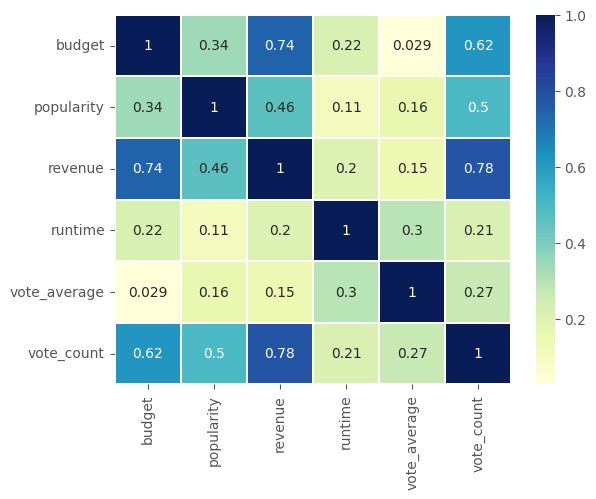

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

From this corr chart we can see that revenue is strongly correlated with budget where as least correlated  runtime.

<ipython-input-19-c988379b6dd2>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




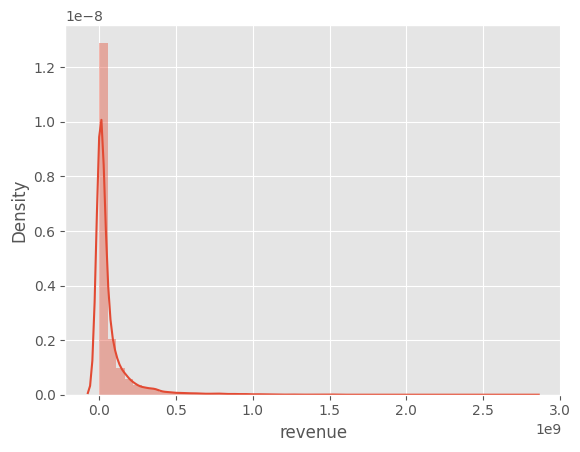

In [ ]:
sns.distplot(df.revenue);

We can see that this data is very skewed and therefore it is difficult to draw conclusion from this graph.we knew to normalise this data.

<font color='blue'>**Introducing log**</font>


Why skewed data is not good fit for modeling in Linear Regression ?

* Because they may act as an outlier ,and we know that outlier is not good for our model performance.
* They have un even mean,median , mode and by law of large number, normal distribution allows the researcher to make more accurate predictions.
* To linearize the fit as much as possible.
Statistical test are usually based on the assumption of normality(normal distribution).

The log transformation, a widely used method to address skewed data, is one of the most popular transformations used in research.There fore we will be using log transformation in reveune.



In [ ]:
#creating log transformation for reveune
df['log_revenue'] = np.log1p(df['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value

<ipython-input-21-419b0ce0e9a4>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribuition of Revenue(log transformation)')

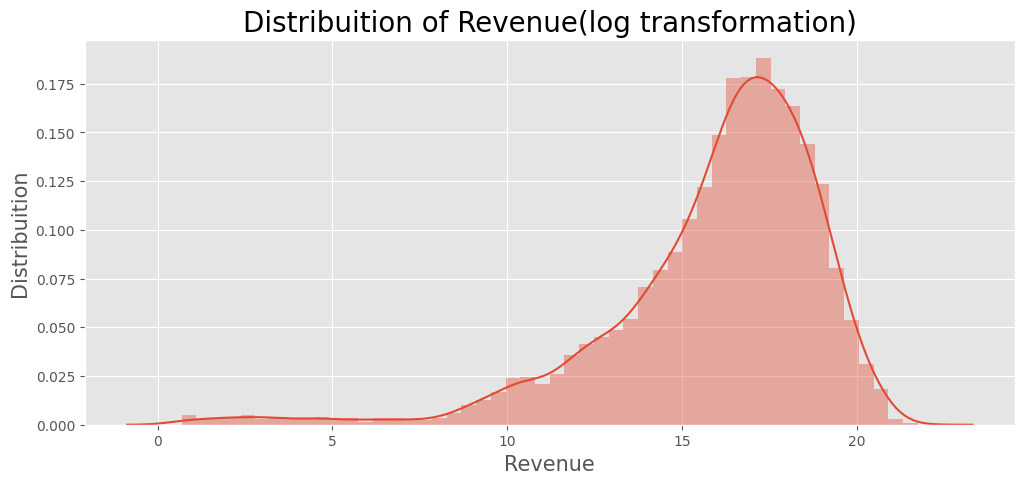

In [ ]:
plt.figure(figsize=(12,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1

# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(df['log_revenue'])
ax.set_xlabel('Revenue', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue(log transformation)", fontsize=20) #seting the title and size of font

<ipython-input-22-2067b0ff8afa>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



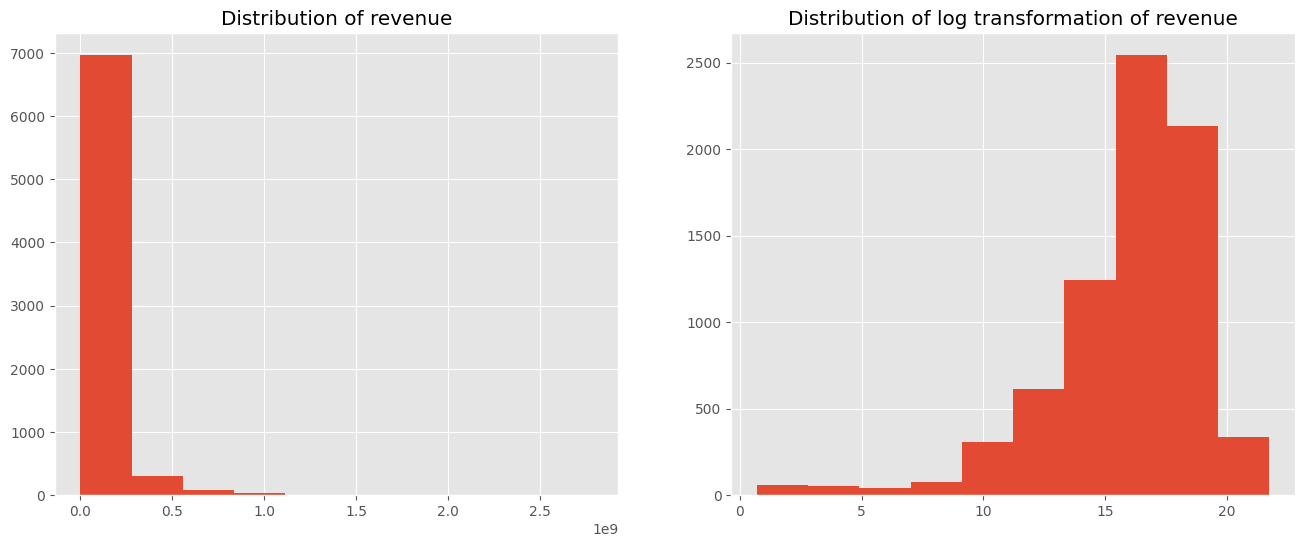

In [ ]:
#comapring distribution of reveune and log revune side by side with histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) #1 means 1 plot, 2 means column and 1 mean 1 sub plot
plt.hist(df['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)#1 means 1 plot, 2 means column and 2 mean second sub plot
plt.hist(df['log_revenue']);
plt.title('Distribution of log transformation of revenue');

We can see that orginal distribution i.e (one without log) is extremely skewed. We used log transformation method and made data normally distribution which has less skeweness and kurtosis.

<font color='blue'>**Relationship between Film Revenue and Budget**</font>

Let's find correlation between revenue and budget. Let's also find the degree of co-relation.

In [ ]:
#log transformation of budget
df['log_budget'] = np.log1p(df['budget'])

<ipython-input-24-2dbbd1cf8a68>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



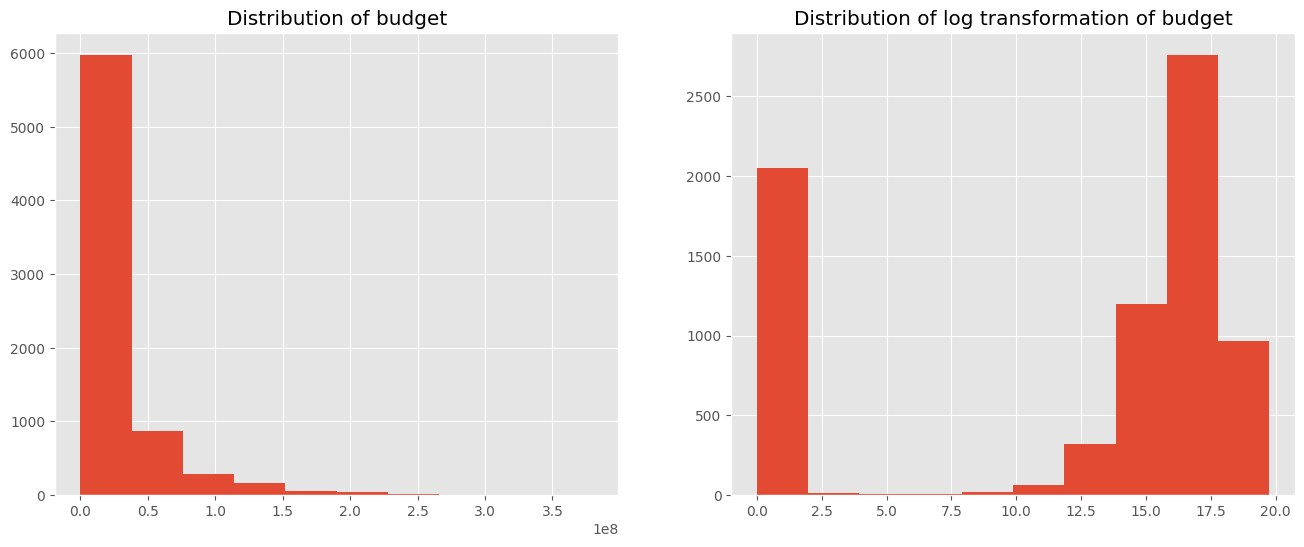

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(df['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(df['log_budget']);
plt.title('Distribution of log transformation of budget');

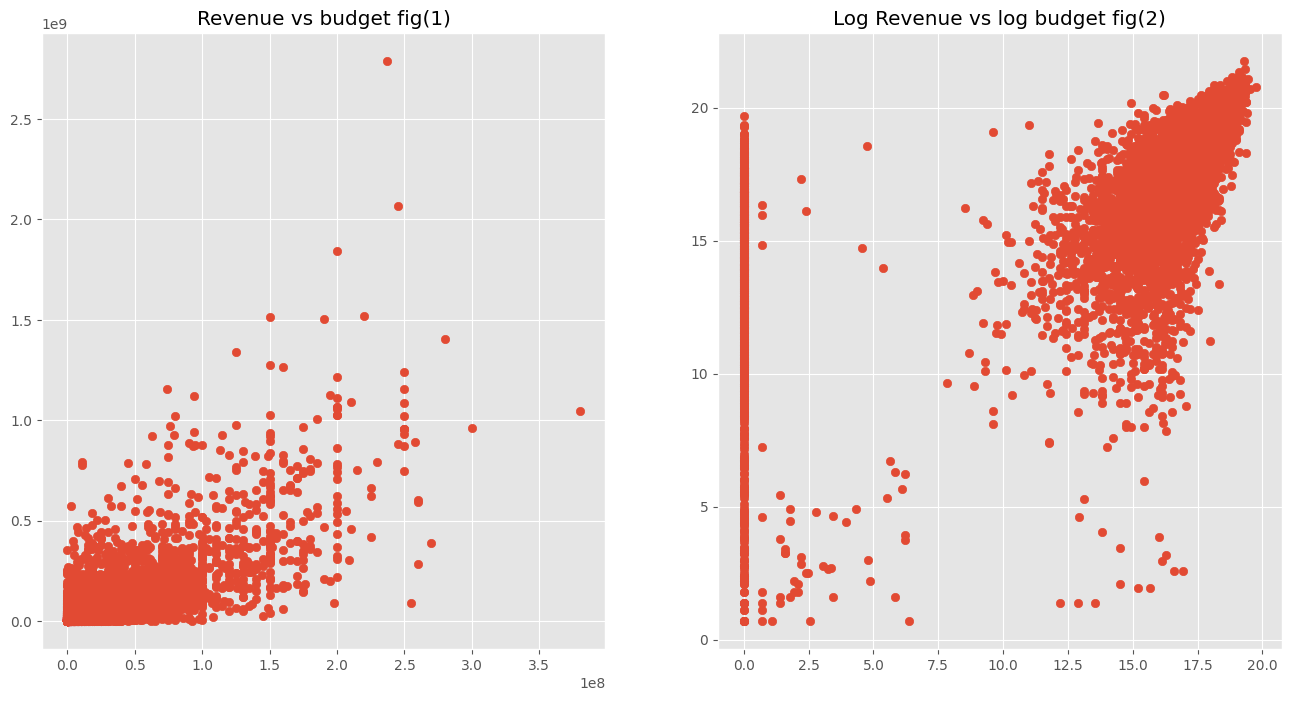

In [ ]:
#let's create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(df['log_budget'], df['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

Fig(1) : we can see that they are some what correlation beween budget and revenue, but we are not clear.

Fig(2) how ever indicates that there is correlation between both variable that is log transformation of reveune and log transformation of budget.

We can also see many movies on zero budget as we identified there were 815 movie that has zero budget which we will clear later.

<font color='blue'>**Is there any relationship with Homepage and Revenue?**</font>

Let's find out the correlation between two variable. We are more interested on answering if having official homepage for movie affects Reveune or not.

We all know that home page will be unique for each movie. Means differnet movie has different home page except the movie that has sequel/prequel. 

In [ ]:
#lets check if movies website has count less than 1( means unique) or more than 1( means repeatetive) or not.
df['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                             4
http://www.thehungergames.movie/                              4
http://www.missionimpossible.com/                             4
http://www.workandtheglory.com/                               3
http://www.kungfupanda.com/                                   3
http://www.thehobbit.com/                                     3
http://www.howtotrainyourdragon.com/                          2
http://www.pokemon.com/us/movies/movie-pokemon-4ever-2002/    2
http://www.evangelion.co.jp/                                  2
http://www.ghostbusters.com/                                  2
Name: homepage, dtype: int64

we can see that transformers movies web page is listed 4 times which is obivous because we are all aware that this movie has seque. Same goes with lord of the rings and hobits.

Let's find if having home page affects revenue or not. And for that lets first find out movies has home page or not.

In [ ]:
#let's creat column called has_homepage and pass two value 1,0 (1, indicates has home page, 0 indicates no page)
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page


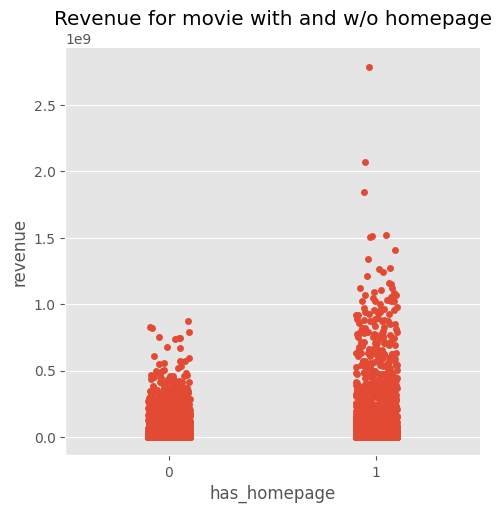

In [ ]:
#since has_homepage is categorical value we will be using seaborn catplot.
sns.catplot(x='has_homepage', y='revenue', data=df);
plt.title('Revenue for movie with and w/o homepage');

From the above fig we can see that movie that has home page (indicated by blue) has more revenue compared to the movie that has no home page. From this scatterplot we can say that they may be correlated.

<font color='blue'>**Langauge distribution vs mean reveune**</font>

Let's find out the relationship between language and revenue .We will be calcualting top 10 langauge from the data frame and will be selecting langauage which is in df orginale_langauge. Here we will be using box plot as box plot is very useful for identifying outlier.

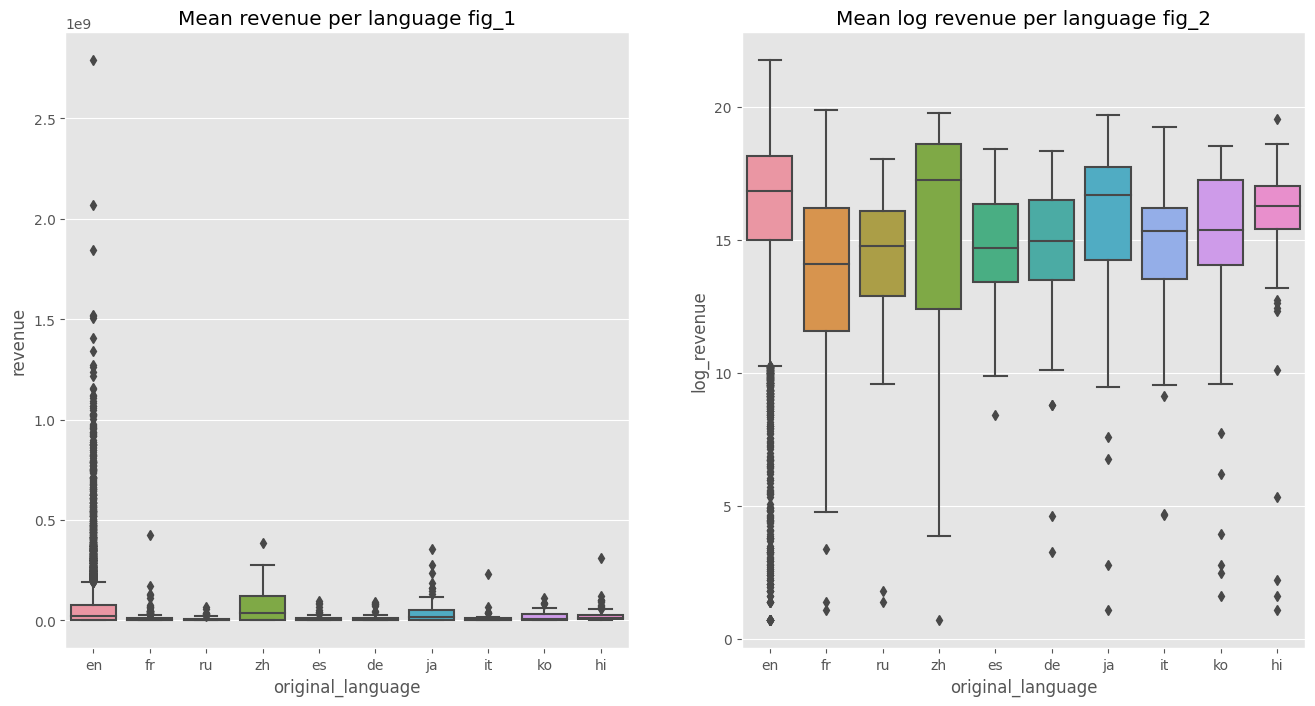

In [ ]:
#we will be using blox pot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language fig_1');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language fig_2');

> From the fig_1 we can see that x-axis indicated langaue plotted. We can see that english language has higher revenue by far margin compared to toher lagnguage. This graph also says us that english language over shadowed all other language in terms of revenue. This information may be quite incorrect and mis leading. Lets see fig_2 for more details

>From the fig_2 : We can see that orginal langauge vs log transformation of revenue and we can see that other language are also creating revenue near english language . How ever it's english language movie that is leading.

<font color='blue'>**What are the frequent Words in Film Titles and Discriptions ?**</font>


This is one of my favourite part of this analysis. I am very curious  to know the popular film titles also wanted to know if  description/synopsis affects revenue or not.

We will be using wordcount library. Word cloud is data visualization technique used for representaion of text data in which size of each word indicates it frequency or importance.

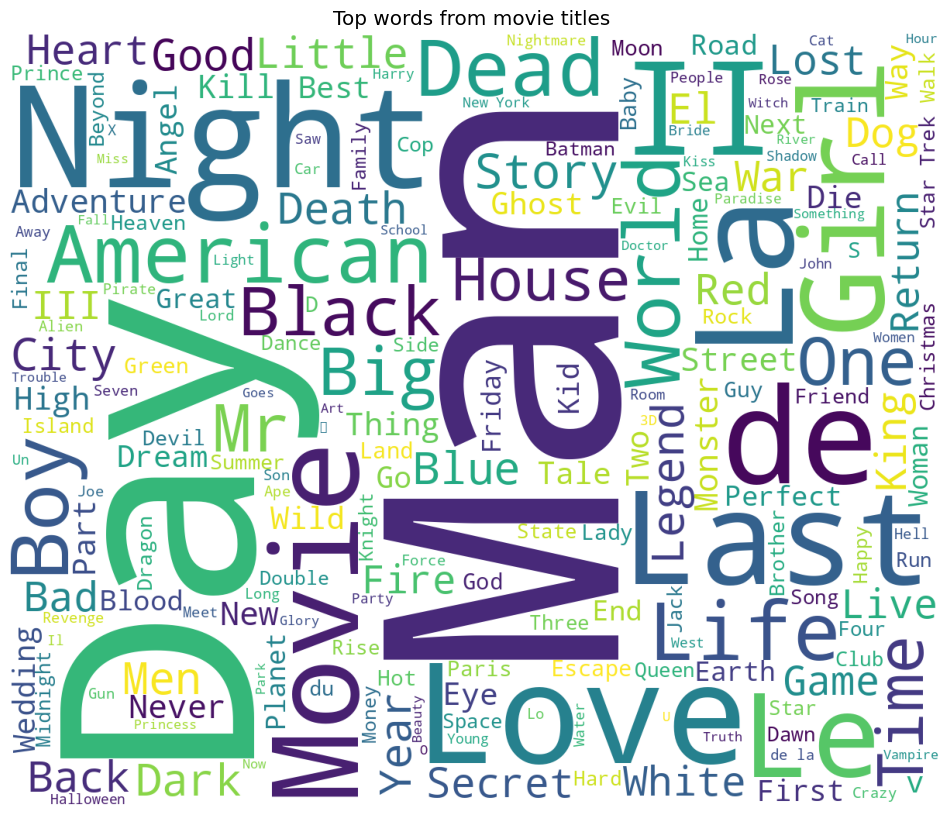

 Time taken to complete this operation is 3.29577374458313 seconds


In [ ]:
#let's find top words from movie Titles
start = time.time()
plt.figure(figsize = (12, 12))
token_title = ' '.join(df['original_title'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") # we dont need axes for this
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

We can see that the most popular word are Man,Last, La and so on. The most popular or frequent words are in bigger in size.

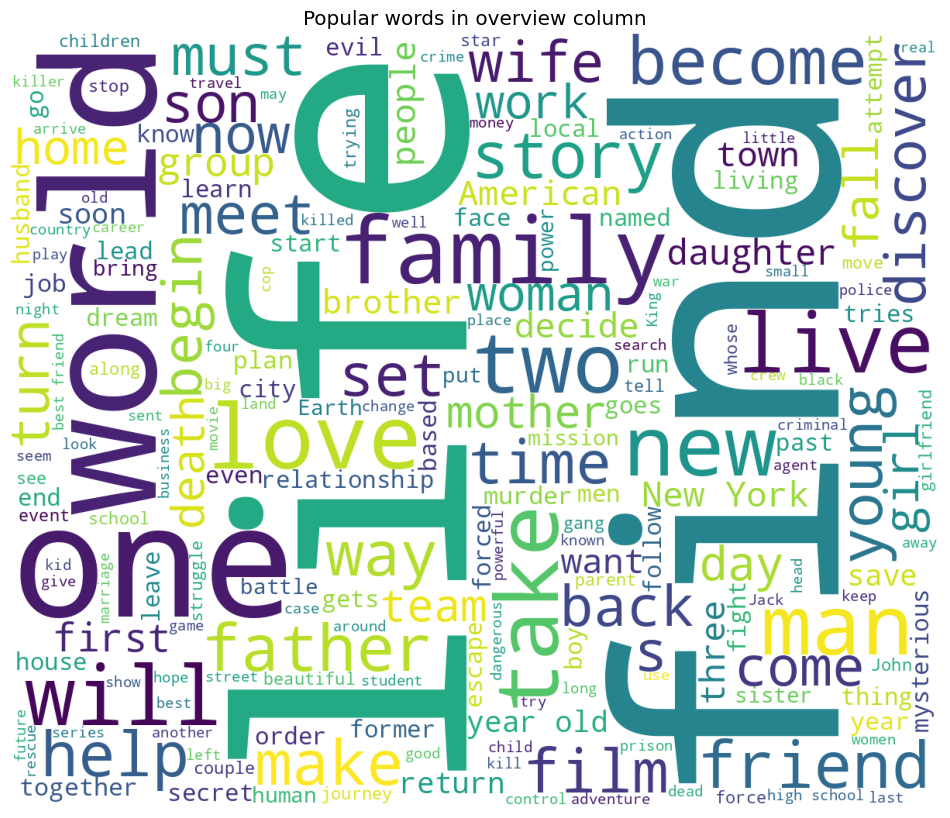

 Time taken to complete this operation is 3.38808274269104 seconds


In [ ]:
#let's find the popular words from overview coulumn
start = time.time()
plt.figure(figsize = (12, 12))
text = ' '.join(df['overview'].fillna('').values) #fill the values with empty string if there is no value in it.
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Popular words in overview column')
plt.axis("off")
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

Larger words means frequent occuring words. We can see that life, find,one and so on are most popular words in movie description.

<font color='blue'>**Does the film description affects revenue**</font>

Let's find out if there is any link between words and revenue. Does the word in description affects revenue?

For this approach we will be using linear regression method . Yes linear regression for string data and we can achieve this by using TFID vector.


* TFID helps tp transforms text to feature vectors that can be used as input to estimator.
* TFID is numerical represenation of frequency of words around data description.

We will fit a linear regression model to this data to predict revenue generate. For this we will be using eli5 pacakge which helps to debug Machine learning classifier and also helps us to explain the prediction.So that it wil be easier to find which words affect revenue.




In [ ]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(df['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, df['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

We can see that words in description can have both positve and negative impacts on revenue. Words like to, bombing ,complication has positive impact and words like politicina,18, violence has negative impact on revenue.

In [ ]:
print('Target value:', df['log_revenue'][1000])
eli5.show_prediction(linreg, doc=df['overview'].values[1000], vec=vectorizer)

Target value: 14.285514812209815


We can see that words in title can have both positve and negative impacts on revenue. Words like don,t age, the secret adn so on  has positive impact and words like death, she, land, hell and so on from movie titles has negative impact.

## <font color='brown'>**Featured Engineering**</font>


Issue with release_date is its not in right format so we need to standarlize using pandas date time format.

In [ ]:
df.loc[df['release_date'].isnull() == False, 'release_date'].head() #to see if release date has null value.

0   1995-10-30
1   1995-12-15
3   1995-12-22
4   1995-02-10
5   1995-12-15
Name: release_date, dtype: datetime64[ns]

<font color='blue'>fixing date column</font>

In [ ]:
#drop nan columns
df = df.dropna(subset = ['release_date'])

In [ ]:
def fix_date(x):
    '''
    if the value of date here is less than
    or equal to 19 we can prepend 20 infront of this
    to say that movie is from 2000s
    else we can prepend 19 to say that the movie is
    from 1900s
    '''
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [ ]:
#df['release_date'] = df['release_date'].apply(lambda x: fix_date(x)) #applying lambda function

In [ ]:
#let's create additional column like Year, month, week, quarter
df['release_date'] = pd.to_datetime(df['release_date']) #converting into panda date time
df['release_date'].head()

<ipython-input-44-331a992f5aef>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0   1995-10-30
1   1995-12-15
3   1995-12-22
4   1995-02-10
5   1995-12-15
Name: release_date, dtype: datetime64[ns]

In [ ]:
def process_date(df_date):
    '''this function add column like 
     year, weeekday, month and so on column
    and add prefix of release_date before 
    all the above column eg realease_date_year'''
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part #add prefix as  "release_date" before the columne
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    return df_date

In [ ]:
df = process_date(df)

<ipython-input-39-86f85a8c182e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-86f85a8c182e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-86f85a8c182e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-86f85a8

In [ ]:
# Count no.of films released per year and sort the years in ascending order
# Do this for both Train and Test Sets
d1 = df['release_date_year'].value_counts().sort_index()


# x values are years, and y values are movie counts, name=legend
data = go.Scatter(x=d1.index, y=d1.values, name='movies data')

layout = go.Layout(title = "Number of films per year", xaxis_title = 'Release date in Year',yaxis_title = 'Movie Count')
py.iplot(dict(data=data, layout=layout))


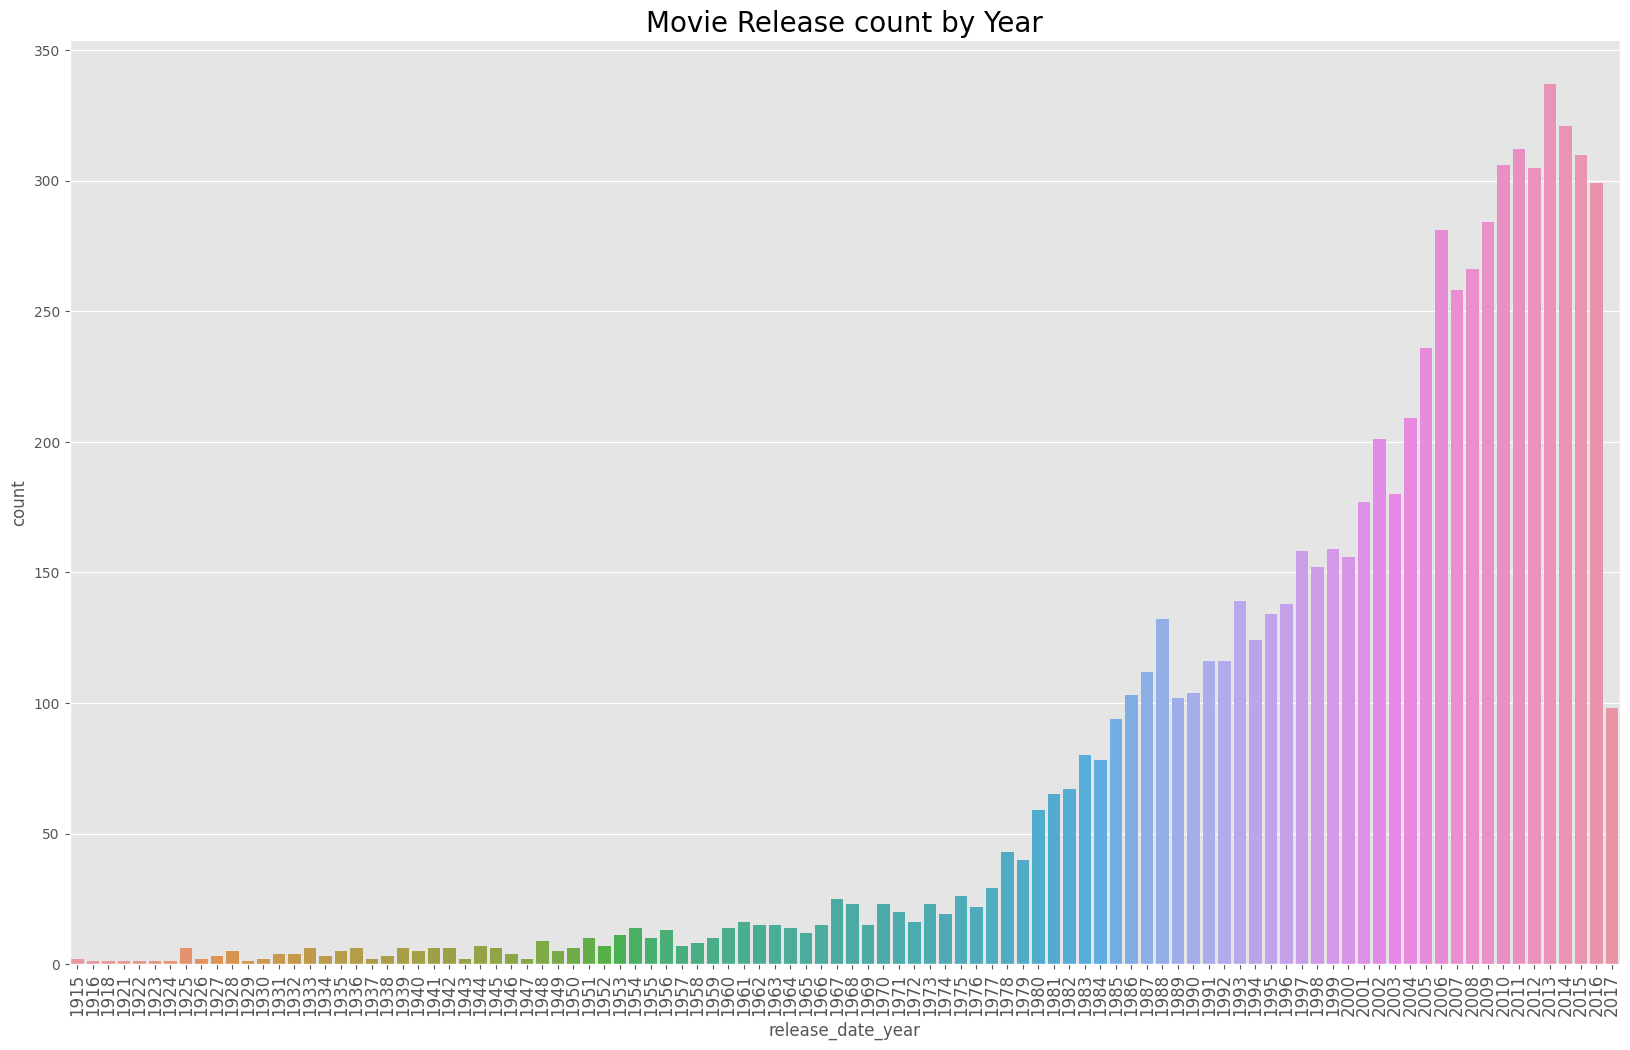

In [ ]:
#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(x = df['release_date_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

We can see that since 2000s there are more movies that has been released.We can see that year 2013 has highes number of movie released i.e 140+ movie in a year.

In [ ]:
#plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

From this chart we can see that graph of total revenue vs movie release count from the year 1930 to 2017

<font color='blue'>**Do release date affects revenue ?**</font>

we will be creating categorical plot as day of the week, month are not continuous data.

<Figure size 2000x500 with 0 Axes>

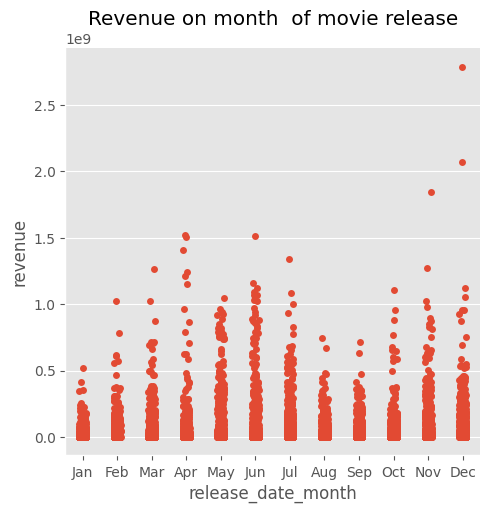

In [ ]:
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='revenue', data=df);
plt.title('Revenue on month  of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()


From the above chart we can see that movie released in April has maximum revenue where as movie released in jan has less revenue compared to other months.

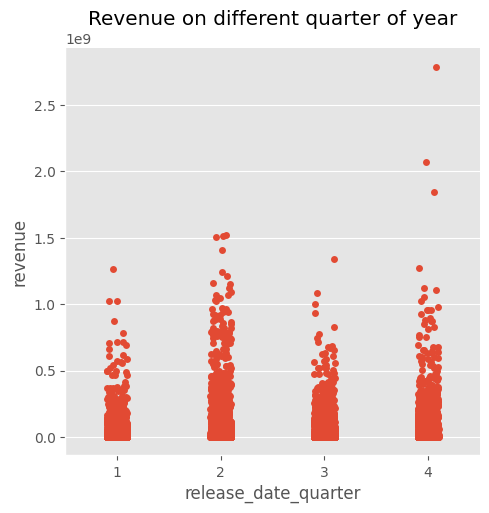

In [ ]:
sns.catplot(x='release_date_quarter', y='revenue', data=df);
plt.title('Revenue on different quarter of year');

From the above chart we can see that movie released in second quarter (April-June) has more revenue compared to movie released in last quarter

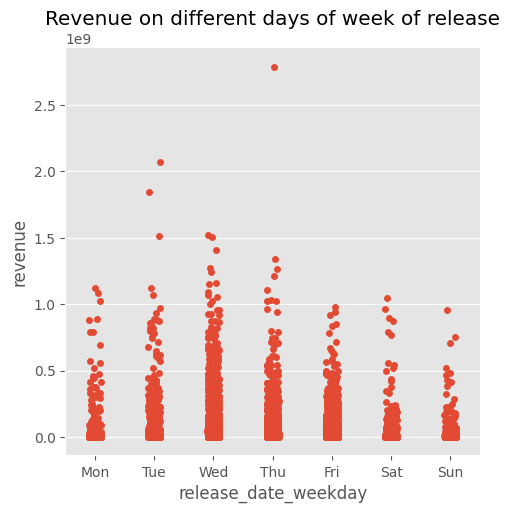

In [ ]:
sns.catplot(x='release_date_weekday', y='revenue', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()


Surprisingly movie released on wednesday and thursday has more revenue.

Well there seems to have correlation but it may not have one to one causal effect.

In [ ]:
#top 20 movie by revenue
movies_20 =  df.sort_values(by='revenue', ascending=False).head(20)[['title','revenue','release_date_year']]

In [ ]:
movies_20

,title,revenue,release_date_year
14551,Avatar,2.787965e+09,2009
26555,Star Wars: The Force Awakens,2.068224e+09,2015
1639,Titanic,1.845034e+09,1997
17818,The Avengers,1.519558e+09,2012
25084,Jurassic World,1.513529e+09,2015
28830,Furious 7,1.506249e+09,2015
26558,Avengers: Age of Ultron,1.405404e+09,2015
17437,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09,2011
22110,Frozen,1.274219e+09,2013
42222,Beauty and the Beast,1.262886e+09,2017


<font color='blue'>**Relation between runtime and revenue ?**</font>

<ipython-input-66-76295ec58d9e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




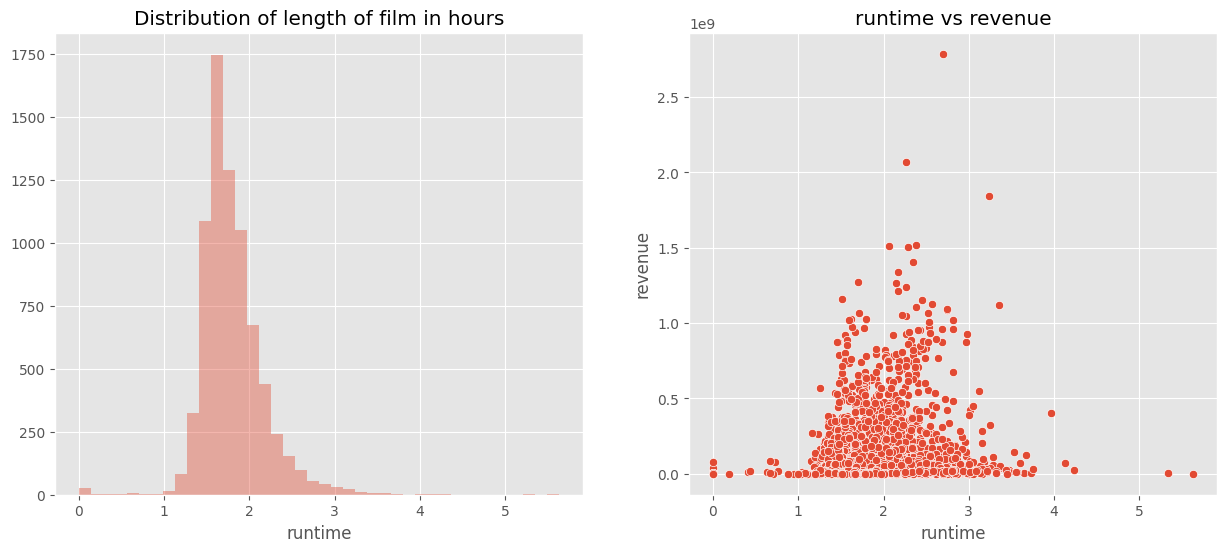

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['runtime'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(x = df['runtime'].fillna(0)/60, y = df['revenue'])
plt.title('runtime vs revenue');


Here we have run time in hour on x-axis and freq of movie in on y axis and then we cas see that most of the movie are between 1-3 hr.And the movie that fall on this duration has highest revenue.

<font color='blue'>**Find top genres from the movie list**</font>

In [ ]:
# Apply the same preprocessing on the string values
df.genres = df.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
df.genres.head()

<ipython-input-67-a461baa499e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
3            [Comedy, Drama, Romance]
4                            [Comedy]
5    [Action, Crime, Drama, Thriller]
Name: genres, dtype: object

In [ ]:
unique_genres = df["genres"].apply(pd.Series).stack().unique()
print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))

<ipython-input-68-4fa7a2fb8a4c>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Number of genres: 20
Genres: ['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Drama' 'Romance'
 'Action' 'Crime' 'Thriller' 'History' 'Science Fiction' 'Mystery' 'Music'
 'Horror' 'War' 'Documentary' 'Foreign' 'Western' 'TV Movie']


In [ ]:
genres_dummies = pd.get_dummies(df["genres"].apply(pd.Series).stack()).sum(level=0) #one hot encoding
genres_dummies.head()

<ipython-input-69-bb7035a0ed9b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-69-bb7035a0ed9b>:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_genres = pd.concat([df, genres_dummies],axis=1, sort=False) #merging two data frame
train_genres.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,19.738573,17.216708,1,1995,0,10,44,30,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,19.386893,17.989898,0,1995,4,12,50,15,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,18.215526,16.588099,0,1995,4,12,51,22,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,18.153832,0.000000,0,1995,4,2,6,10,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,False,NaN,60000000.0,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,19.048952,17.909855,0,1995,4,12,50,15,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


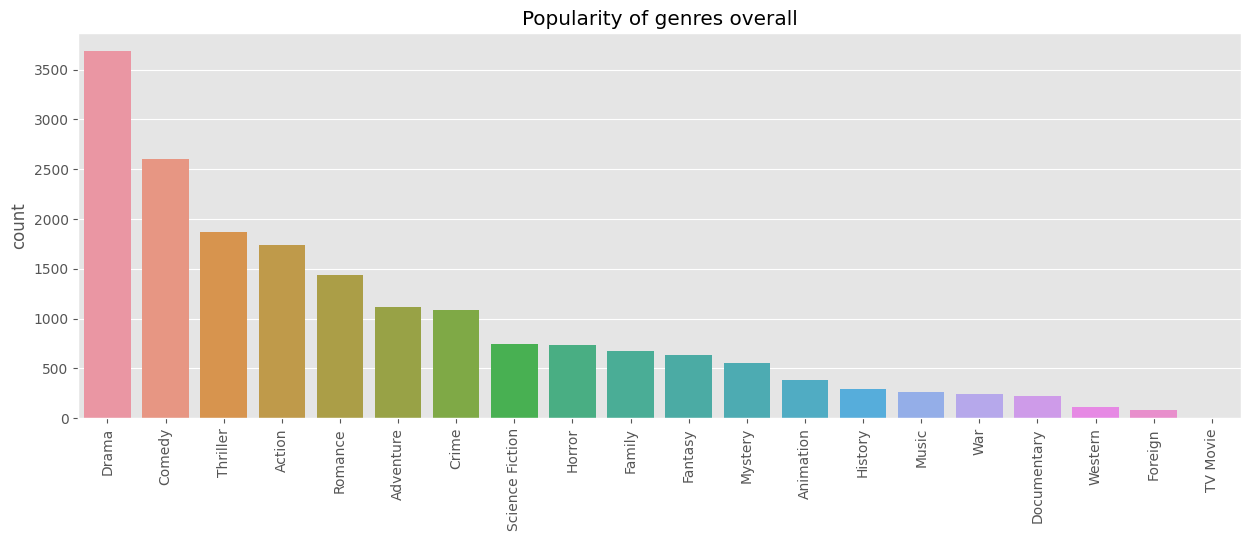

In [ ]:
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Popularity of genres overall")
plt.ylabel("count")
plt.show()

We can see that , from above genre, Drama is more popular ad foreign movie are least popular.

<font color='blue'>**Model Prediction**</font>

In [ ]:
train_genres.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'log_revenue', 'log_budget',
       'has_homepage', 'release_date_year', 'release_date_weekday',
       'release_date_month', 'release_date_weekofyear', 'release_date_day',
       'release_date_quarter', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
#selecting the numeric column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #so that easy for us to perform  train and test
df_train=train_genres.select_dtypes(include=numerics)

In [ ]:
#dropping the id coulmn
#df_train.drop(columns=['id'],inplace=True) #we will be dropping ID

# Clear null values
df_train=df_train.fillna(df_train.median()) #let's film the empty value with median of the data set

In [ ]:
#selecting dataframe that is float,int
df_train.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'log_revenue', 'log_budget', 'has_homepage',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_weekofyear', 'release_date_day', 'release_date_quarter',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

<font color='blue'>**Loading data from Training**</font>

In [ ]:
#training the model
X = df_train.drop(['revenue', 'log_revenue'], axis=1)
y= df_train['revenue'] #prediction


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
#linear regression
lm = LinearRegression() #our 6th model
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("R Square: ", r2_score(y_test, lm_preds))

R Square:  0.769271368770768


Our R square value is 76.9%

In [ ]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: 0.7796077971155344


Our predicted from Random forest is 77.9% accurate.

                         importance
feature                            
vote_count                    0.602
budget                        0.114
log_budget                    0.099
popularity                    0.026
runtime                       0.025
release_date_year             0.024
release_date_weekofyear       0.019
vote_average                  0.018
release_date_day              0.013
Family                        0.009
release_date_month            0.008
release_date_weekday          0.007
Adventure                     0.007
Animation                     0.006
Romance                       0.004
Drama                         0.003
Science Fiction               0.002
Thriller                      0.002
Fantasy                       0.002
Comedy                        0.002
Action                        0.002
release_date_quarter          0.002
has_homepage                  0.002
Crime                         0.001
Music                         0.001
Mystery                     

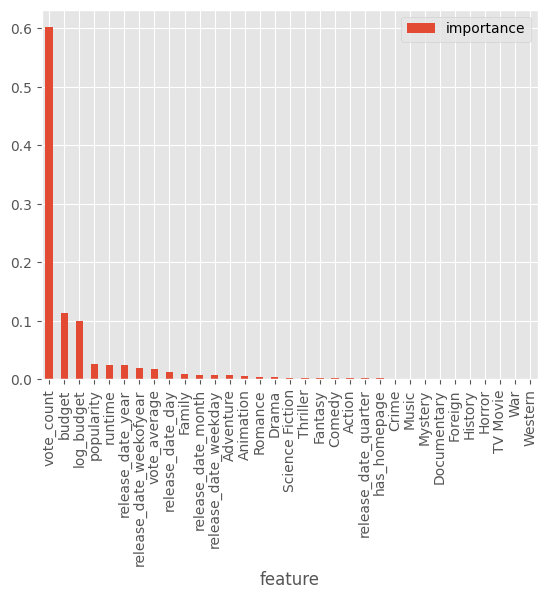

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar();

We can see that Budget, popularity, runtime and release date of year (as release date of year is associated with population)has more weight on our feature.

### LGB MODEL

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [ ]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [ ]:
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2


Weight,Feature
0.6067,vote_count
0.2256,budget
0.0356,popularity
0.0261,log_budget
0.0183,Family
0.0161,release_date_year
0.0147,vote_average
0.0132,runtime
0.0066,Adventure
0.0064,release_date_weekofyear


### GB regressor

In [ ]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")



Training Score: 0.8897519059719706


In [ ]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 2952750491899226.0, R2: 0.8744982297530408


Our R square predicted from GB booster is quite better than other model with R square of 87%

In [ ]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions,columns = ['revenue_predictions'])
gbr_predictions.head()

,revenue_predictions
0,1.921930e+07
1,4.313057e+07
2,1.098564e+07
3,4.263394e+07
4,6.108859e+07


In [ ]:
test_result = gbr_predictions.join(y_test.reset_index(drop=True))
test_result = test_result.join(X_test.reset_index(drop=True))

#look at top values only
test_result = test_result[['budget', 'popularity', 'vote_average','vote_count','release_date_year','release_date_month', 'revenue','revenue_predictions']]
test_result.head()

,budget,popularity,vote_average,vote_count,release_date_year,release_date_month,revenue,revenue_predictions
0,5000000.0,8.132748,6.2,261.0,2011,8,3142154.0,1.921930e+07
1,1987650.0,7.389437,6.6,853.0,2010,9,19152480.0,4.313057e+07
2,0.0,10.638289,6.4,45.0,1987,10,18782400.0,1.098564e+07
3,20000000.0,7.275649,5.8,488.0,2010,8,65464324.0,4.263394e+07
4,38000000.0,6.938921,5.8,205.0,1990,6,153518974.0,6.108859e+07


Here we can see reveune predicted from our testing model

## <font color='brown'>Conclusion</font>

Key Finding:
<font color = 'green'>
* Drama is the most popular genre, followed by Comedy, Thriller, and Action.
* Foreign Movie has Less revenue among all the genres.
* 2013 had the most movie released in a single calendar year.
* Avenger, Furious 7, Beauty and the Beast were among the top 3 revenue generated by the movie.
* Movies released in the second quarter of the year generated the most revenue.
* There was a high correlation between movie budget and movie revenue.
* Movies with a high budget have shown the tendency of high revenues.
</font>

**The key point from the above model training and the tunning process is that we may be able to predict the movie revenue using featured labels like the Movie release date of the year( as the year is associated with the population of that time, Budget of movie, Popularity, run time. And Movie industries and persons associated with Movies can use the Machine learning model to predict the revenue of the movie by inputting the above featured**.

**We had a data set of 3000 rows and 23 columns originally. We trained and test using the above data set. There fore, we have some limitations on our model as it could not provide accurate results and to improve model performance we have to add more data set and add a few featured variables.Therefore, a larger number of observations to capture more variability in the movie data in our testing data set is required to have a better measure of the model’s accuracy.**